# <font color=4CBB17>**Modelos**</font>

In [2]:
from google.colab import drive
import sys
import os

drive.mount('/content/drive')
path = '/content/drive/MyDrive/cod/LEA3_health_7'

sys.path.append(path)
os.chdir(path)

os.curdir

Mounted at /content/drive


'.'

In [3]:
import numpy as np
import joblib ### para cargar array

########Paquetes para NN #########

from sklearn import metrics ### para analizar modelo
from sklearn.ensemble import RandomForestClassifier  ### para analizar modelo
import pandas as pd

from sklearn import tree
import tensorflow as tf


import cv2 ### para leer imagenes jpeg
### pip install opencv-python

from matplotlib import pyplot as plt #

from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
# Se cargan los datos preprocesados
x_train = joblib.load('salidas/x_train.pkl')
y_train = joblib.load('salidas/y_train.pkl')
x_test = joblib.load('salidas/x_test.pkl')
y_test = joblib.load('salidas/y_test.pkl')

 # <font color=4CBB17>**Modelos Shallow learning**</font>

In [5]:
x_train.shape
x_test.shape

(2003, 22517)

In [6]:
##### validamos que sea un archivo de 1d ############
x_train[1]

array([158, 141, 157, ..., False, False, False], dtype=object)

## **Métricas de evaluación**

Importante

**Falsos positivos(FP):** lesiones benignas que son clasificadas como malignas

**Falsos negativos(FN):** lesiones malignas que son clasificadas como benignas

**Recall:** Mide la capacidad del modelo para identificar correctamente las lesiones malignas, es decir, de todas las lesiones cutáneas que realmente son malignas, ¿cuántas logramos detectar?

>Esta métrica es prioritaria, ya que buscamos minimizar los falsos negativos (FN). No queremos que una lesión maligna pase desapercibida, ya que esto podría tener consecuencias graves en el diagnóstico del paciente.

F1-Score: Es el promedio armónico entre precisión y recall. Resulta útil cuando hay un desbalance entre clases y se quiere un equilibrio entre evitar falsos positivos(FP) y falsos negativos(FN).

>En este caso, sirve para evaluar el balance general del modelo.

AUC: Evalúa la capacidad del modelo para distinguir entre lesiones malignas y benignas. Considera tanto la tasa de verdaderos positivos (recall) como la tasa de falsos positivos (cuántas lesiones benignas son clasificadas como malignas).

>Esta métrica es útil cuando el modelo tiende a clasificar muchas lesiones benignas como malignas, lo cual puede generar una carga innecesaria de trabajo clínico. AUC nos ayuda a evaluar si el modelo está balanceado y no sobredimensiona el riesgo.

De entrada se sabe que hay un desbalance de clases entre lesiones malignas y no_malignas, por lo tanto nos vamos a fijar  

## <font color=FF7F50>**Random Forest**</font>


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6462
           1       1.00      1.00      1.00      1550

    accuracy                           1.00      8012
   macro avg       1.00      1.00      1.00      8012
weighted avg       1.00      1.00      1.00      8012

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1599
           1       0.71      0.28      0.41       404

    accuracy                           0.83      2003
   macro avg       0.77      0.63      0.65      2003
weighted avg       0.82      0.83      0.80      2003

1.0
0.627317351810228


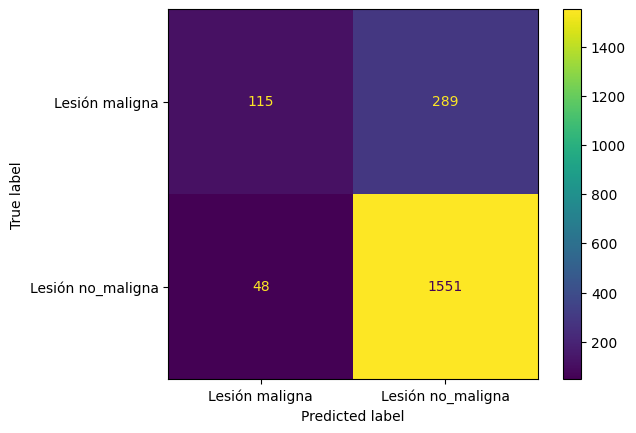

In [7]:
# Definir etiquetas para continuar
rf=RandomForestClassifier(random_state=123)
rf.fit(x_train, y_train)

pred_train=rf.predict(x_train)
print(metrics.classification_report(y_train, pred_train))


pred_test=rf.predict(x_test)
print(metrics.classification_report(y_test, pred_test))

print(metrics.roc_auc_score(y_train, pred_train))
print(metrics.roc_auc_score(y_test, pred_test))

cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Lesión maligna', 'Lesión no_maligna']) ## (Cambiar etiquetas)
disp.plot()

El modelo funciona bien detectando las lesiones no malignas, pero es débil detectando las malignas, esto es peligroso en medicina, donde es más grave no detectar un cáncer (FN) que dar un falso positivo (FP).

El modelo funciona muy bien para la etiqueta de no cancer pero para la etiqueta de cancer vemos que el recall: es de un 28% lo que dice que clasifica como pacientes de cancer solo en 28% con la etiqueta Lesión maligna


## <font color=FF7F50>**Decision Trees**</font>


In [8]:
clf_dt= tree.DecisionTreeClassifier()
clf=clf_dt.fit(x_train, y_train)

pred_train=clf_dt.predict(x_train)
print(metrics.classification_report(y_train, pred_train))
metrics.roc_auc_score(y_train, pred_train)

pred_test=clf_dt.predict(x_test)
print(metrics.classification_report(y_test, pred_test))
metrics.roc_auc_score(y_test, pred_test)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6462
           1       1.00      1.00      1.00      1550

    accuracy                           1.00      8012
   macro avg       1.00      1.00      1.00      8012
weighted avg       1.00      1.00      1.00      8012

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1599
           1       0.42      0.41      0.41       404

    accuracy                           0.77      2003
   macro avg       0.64      0.63      0.63      2003
weighted avg       0.76      0.77      0.77      2003



np.float64(0.6329265196688524)

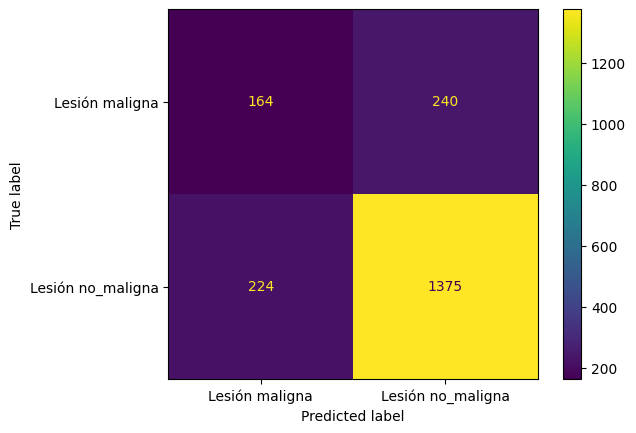

In [9]:
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Lesión maligna', 'Lesión no_maligna'])
disp.plot()

Al utilizar el algoritmo de árboles de decisión, se detectan más casos de cáncer que con el modelo de bosques aleatorios.

Mejoró el recall en comparación con el modelo de random forest, pero aun así, un recall del 45% sigue siendo bajo para un tema tan sensible como lo es decir que una persona no tiene cáncer cuando en realidad sí lo tiene. El accuracy se redujo un poco, ya que ahora el modelo no es tan bueno prediciendo correctamente los casos en los que no hay cáncer.

Es necesario validar cual es el enfoque más adecuado, pero optamos por priorizar una métrica como el AUC, ya que mide de manera global y considera tanto la tasa de verdaderos positivos como la de falsos positivos, permitiendo evaluar la capacidad del modelo para distinguir entre clases

In [10]:
# Transformacion de tipo para poder correr la red neuronal.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

## <font color=FF7F50>**Redes neuronales convencionales (ANN)**</font>


In [14]:
fc_model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


checkpoint = ModelCheckpoint(
    filepath='salidas/best_model_ann_auc.keras',
    monitor='val_AUC',        # Validar la metrica que se va a escoger de momento Recall
    mode='max',               # Usar max ya que buscamos maximizar la metrica en este punto debido a que representa un mejor resultado
    save_best_only=True,
    verbose=1
)

# configura el optimizador y la función para optimizar

fc_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC', 'Recall', 'Precision'])


###### Entrenar el modelo usando el optimizador y arquitectura definidas #########
fc_model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test), callbacks=[checkpoint])


######### Evaluar el modelo ####################
test_loss, test_acc, test_auc, test_recall, test_precision = fc_model.evaluate(x_test, y_test, verbose=2)
print("Test Recall:", test_recall)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - AUC: 0.5165 - Precision: 0.2137 - Recall: 0.2597 - accuracy: 0.6727 - loss: 658.5447
Epoch 1: val_AUC improved from -inf to 0.53928, saving model to salidas/best_model_ann_auc.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - AUC: 0.5164 - Precision: 0.2137 - Recall: 0.2592 - accuracy: 0.6729 - loss: 657.3481 - val_AUC: 0.5393 - val_Precision: 0.3198 - val_Recall: 0.1559 - val_accuracy: 0.7629 - val_loss: 57.9120
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - AUC: 0.5399 - Precision: 0.2543 - Recall: 0.2852 - accuracy: 0.6950 - loss: 219.4494
Epoch 2: val_AUC did not improve from 0.53928
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - AUC: 0.5401 - Precision: 0.2547 - Recall: 0.2853 - accuracy: 0.6953 - loss: 218.3193 - val_AUC: 0.5296 - val_Precision: 0.4571 - val_Recall: 0.0792 - val_accuracy: 0.7953 - val_loss: 44.1388
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - AUC: 0.5613 - Precision: 0.2959 - Recall: 0.2789 - accuracy: 

In [16]:
best_auc = tf.keras.models.load_model('salidas/best_model_ann_auc.keras')
test_loss, test_acc, test_auc, test_recall, test_precision = best_auc.evaluate(x_test, y_test, verbose=2)
print("Test auc:", test_auc)


63/63 - 3s - 48ms/step - AUC: 0.6991 - Precision: 0.3384 - Recall: 0.7723 - accuracy: 0.6495 - loss: 42.8900
Test auc: 0.6991374492645264


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      1599
         1.0       0.42      0.27      0.33       404

    accuracy                           0.78      2003
   macro avg       0.63      0.59      0.60      2003
weighted avg       0.75      0.78      0.76      2003



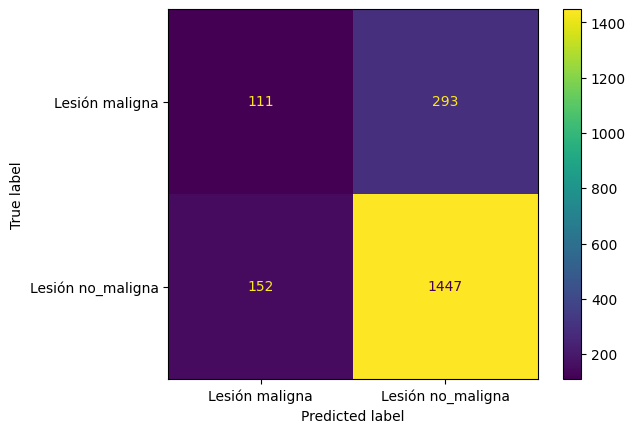

In [13]:
# Matriz de confusión test
pred_test = (best_auc.predict(x_test) > 0.5).astype('int')
cm = metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp = metrics.ConfusionMatrixDisplay(cm,display_labels=['Lesión maligna', 'Lesión no_maligna'])
disp.plot()

print(metrics.classification_report(y_test, pred_test))


El modelo con las redes neuronales cuenta com mejor desempeño en el AUC con casi 70%. Esto indica que tiene una mayor capacidad para diferenciar entre los casos lesiones malignas y no malignas, lo cual es crucial en este tipo de problemas.

Por lo anterior, se explorará el uso de redes neuronales convolucionales (CNN), que han demostrado ser especialmente eficaces en el análisis de imágenes.